### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ  
### Факультет искусственного интеллекта  
### Дисциплина: Инструменты обработки и визуализации данных  
## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3  
#### Студент:  Князев Арсений
#### Группа:   ЗФИбд-01-24  
#### Тексты № 3, 4, 7

1. Для каждого из текстов подсчитайте и выведите кол-во символов, кол-во слов и кол-во предложений в текстах. Определите и выведите на экран три самых длинных слова в текстах. Для каждого из текстов подсчитайте и выведите минимальное, максимальное и среднее кол-во слов в предложениях текста.

2. Оцените и выведите, какой из текстов более читабелен по критерию индекса лёгкости чтения по шкале Флеша и индексу туманности Ганнинга.

3. Для каждого из текстов выполните токенизацию и определите пять наиболее часто встречающихся токена и частоты их повторения. 

4. Для каждого из текстов выполните лемматизацию текстов и визуализируйте при помощи гистограммы распределение длин лемм в текстах.

5. Для каждого из текстов удалите стоп-слова, знаки препинания и неалфавитные символы и определите, какое кол-во токенов было. 

6. Для каждого из текстов выполните разметку частей речи, определите и выведите кол-во токенов каждого типа. Визуализируйте кол-во токенов каждого типа в текстах в виде столбчатых диаграмм.

7. Для каждого из текстов найдите именованные сущности, выведите и подсчитайте их кол-во для каждого типа.

8. Для имеющихся текстов постройте векторы tf-idf и выведите форму (shape) построенной матрицы.

9. Вычислите попарное сходство текстов при помощи косинусного расстояния и определите два наиболее похожих текста из трех.

### Подготовка
___

In [50]:
import spacy
import textstat
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
#!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0.tar.gz

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
files = ["Story_3_MAYO.txt", "Story_4_KELLY.txt", "Story_7_HAWTHORNE.txt"]
corpus = []
for i in files:
    with open(i) as file:
        corpus.append(file.read())
        file.close()

### Задание 1
___

In [31]:
for i, text in enumerate(corpus, start=1):
    doc = nlp(text)

    num_chars = len(text)

    words = [token.text for token in doc if token.is_alpha]
    num_words = len(words)

    sentences = list(doc.sents)
    num_sentences = len(sentences)

    longest_words = sorted(words, key=len, reverse=True)[:3]

    sentence_lengths = [
        len([token for token in sent if token.is_alpha]) for sent in sentences
    ]

    min_len = min(sentence_lengths)
    max_len = max(sentence_lengths)
    avg_len = sum(sentence_lengths) / len(sentence_lengths)

    print(f"Текст {i}")
    print(f"Кол-во символов: {num_chars}")
    print(f"Кол-во слов: {num_words}")
    print(f"Кол-во предложений: {num_sentences}")
    print(f"Три самых длинных слова: {', '.join(longest_words)}")
    print(f"Мин. слов в предложении: {min_len}")
    print(f"Макс. слов в предложении: {max_len}")
    print(f"Среднее слов в предложении: {avg_len:.2f}")

Текст 1
Кол-во символов: 12641
Кол-во слов: 2223
Кол-во предложений: 125
Три самых длинных слова: demonstration, Pennsylvania, Nevertheless
Мин. слов в предложении: 0
Макс. слов в предложении: 81
Среднее слов в предложении: 17.78
Текст 2
Кол-во символов: 27175
Кол-во слов: 4755
Кол-во предложений: 288
Три самых длинных слова: acquaintanceships, congratulations, uncontaminated
Мин. слов в предложении: 0
Макс. слов в предложении: 61
Среднее слов в предложении: 16.51
Текст 3
Кол-во символов: 43838
Кол-во слов: 7791
Кол-во предложений: 309
Три самых длинных слова: undistinguished, conventionalism, simultaneously
Мин. слов в предложении: 1
Макс. слов в предложении: 94
Среднее слов в предложении: 25.21


### Задание 2
___

In [30]:
for i, text in enumerate(corpus, start=1):
    flesch = textstat.flesch_reading_ease(text)
    fog = textstat.gunning_fog(text)
    print(f"Текст {i}")
    print(f"Индекс Флеша (FRE): {flesch:.2f}")
    print(f"Индекс Ганнинга (Fog): {fog:.2f}\n")

best_flesch = max(
    enumerate(corpus, start=1), key=lambda x: textstat.flesch_reading_ease(x[1])
)[0]
print(f"📘 Текст {best_flesch} наиболее читаем по индексу Флеша.")


Текст 1
Индекс Флеша (FRE): 78.24
Индекс Ганнинга (Fog): 8.15

Текст 2
Индекс Флеша (FRE): 76.39
Индекс Ганнинга (Fog): 8.37

Текст 3
Индекс Флеша (FRE): 65.78
Индекс Ганнинга (Fog): 11.51

📘 Текст 1 наиболее читаем по индексу Флеша.


### Задание 3
___

In [23]:
docs = [nlp(text) for text in corpus]

In [29]:
for i, doc in enumerate(docs, start=1):
    tokens = [t.text.lower() for t in doc if t.is_alpha]
    freq = Counter(tokens)
    top5 = freq.most_common(5)

    print(f"Текст {i}")
    for token, count in top5:
        print(f"{token} — {count}", end="\n")

Текст 1
the — 178
of — 76
and — 64
a — 56
to — 46
Текст 2
the — 173
and — 147
to — 125
of — 99
i — 92
Текст 3
the — 498
of — 285
and — 278
a — 263
to — 159


### Задание 4
___

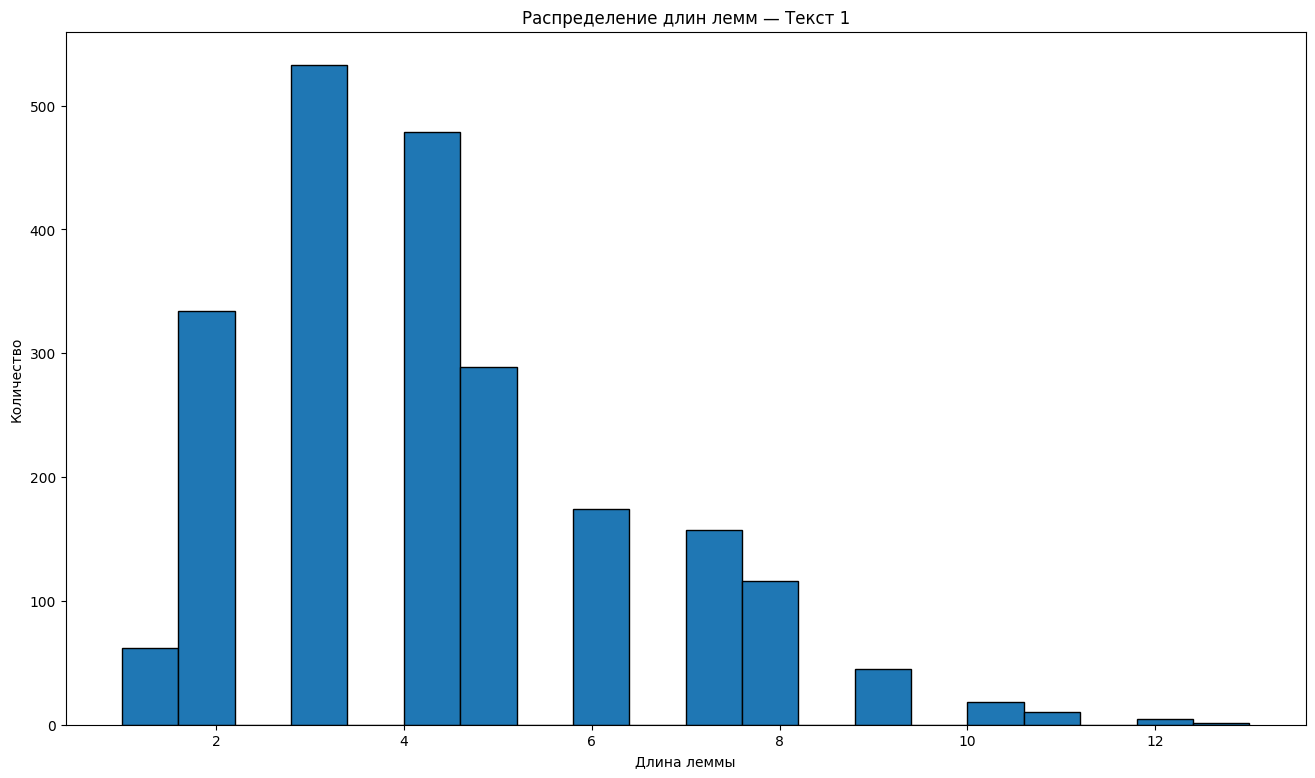

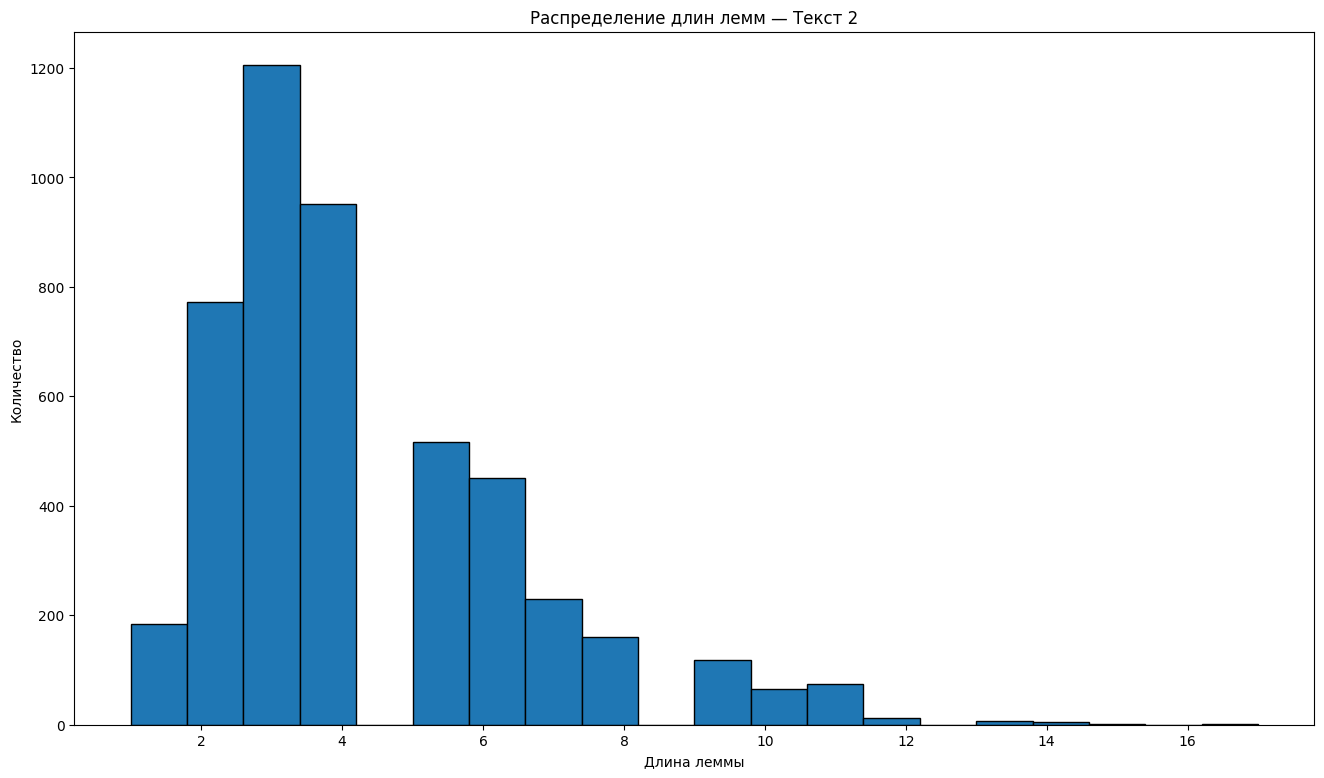

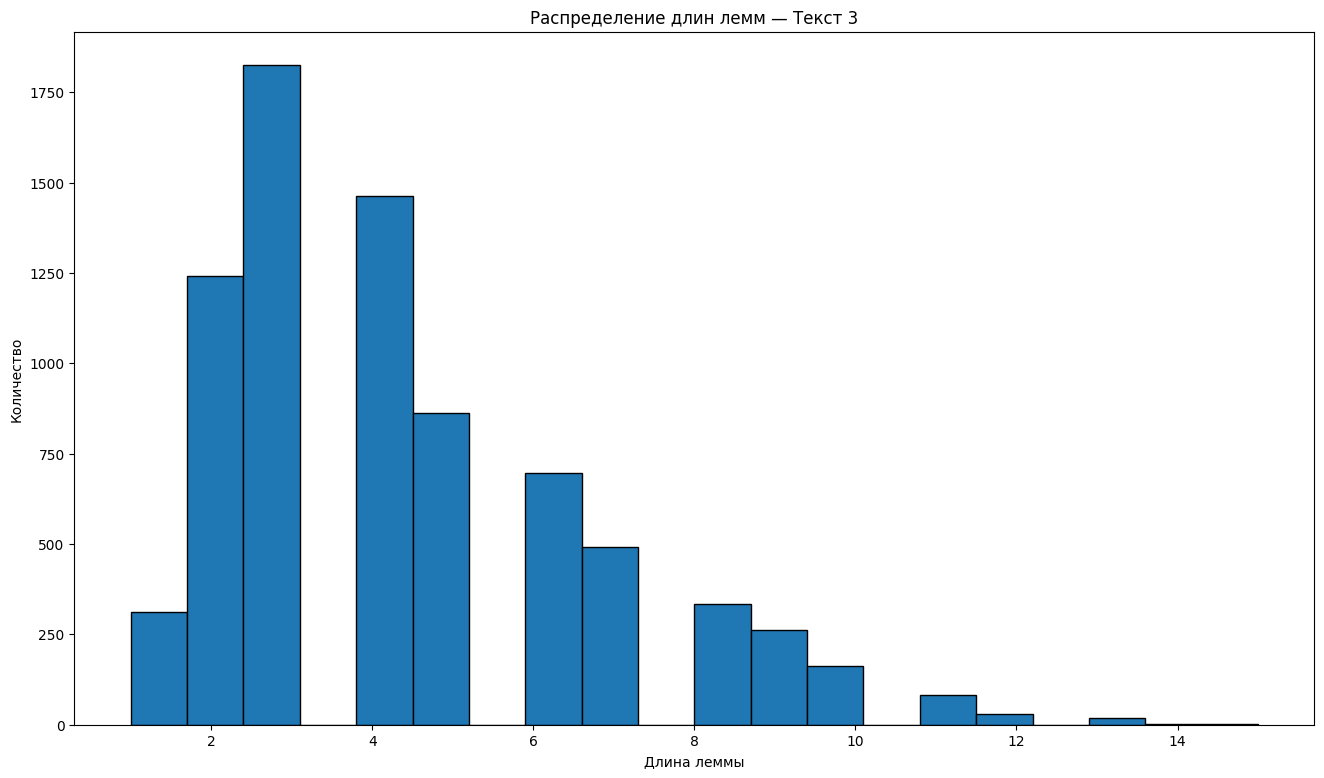

In [ ]:
for i, doc in enumerate(docs, start=1):
    lemmas = [t.lemma_.lower() for t in doc if t.is_alpha]
    lengths = [len(l) for l in lemmas]

    plt.figure(figsize=(16, 9))
    plt.hist(lengths, bins=20, edgecolor="black")
    plt.title(f"Распределение длин лемм — Текст {i}")
    plt.xlabel("Длина леммы")
    plt.ylabel("Количество")
    plt.show()

### Задание 5
___

In [ ]:
cleaned_texts = []
STOP_WORDS = spacy.lang.ru.stop_words.STOP_WORDS
for i, doc in enumerate(docs):
    cleaned_tokens = [
        token.text.lower()
        for token in doc
        if token.is_alpha and token.text.lower() not in STOP_WORDS
    ]
    cleaned_texts.append(cleaned_tokens)
    print(f"Текст {i + 1}: {len(cleaned_tokens)} токенов после очистки")

Текст 1: 2223 токенов после очистки
Текст 2: 4755 токенов после очистки
Текст 3: 7791 токенов после очистки


### Задание 6
___

Текст 1: количество токенов по частям речи
X: 2172
PROPN: 47
PRON: 1
NOUN: 3


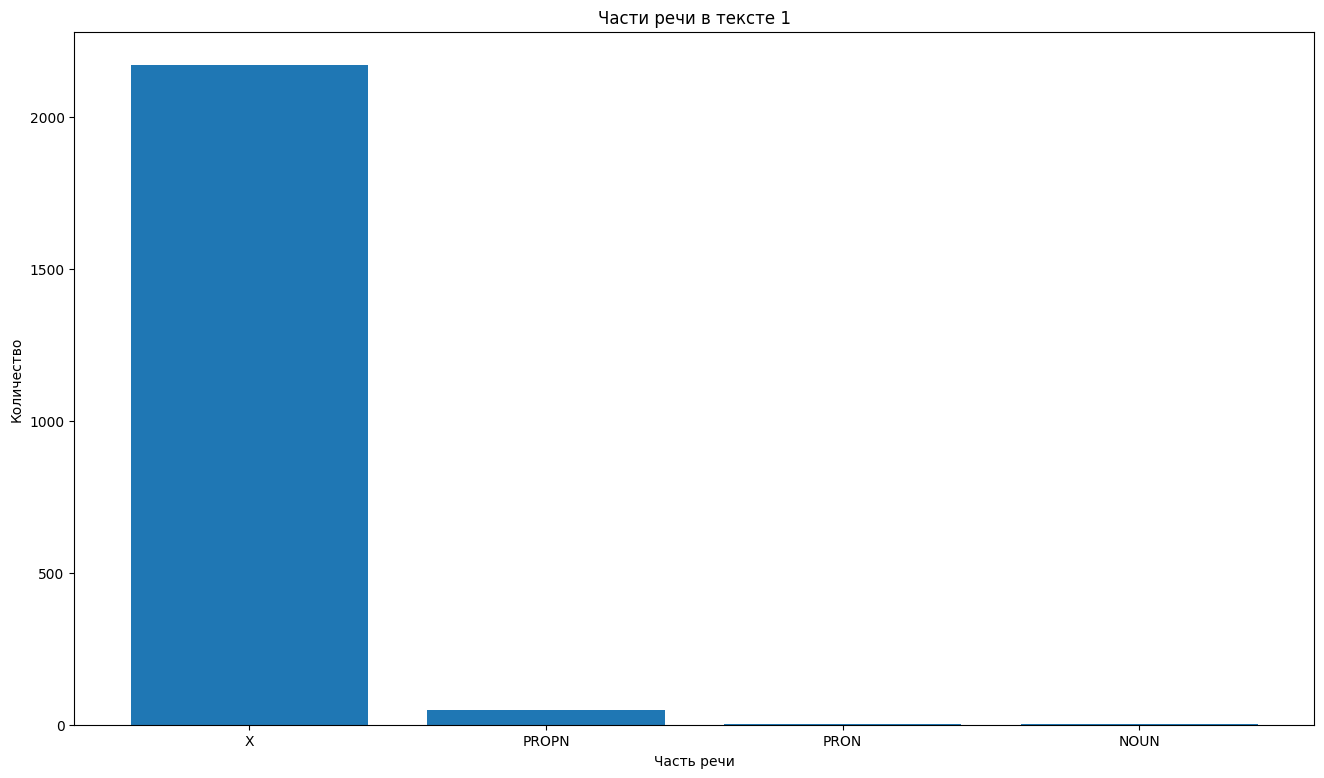

Текст 2: количество токенов по частям речи
PROPN: 111
X: 4630
NOUN: 3
PRON: 7
ADJ: 2
CCONJ: 2


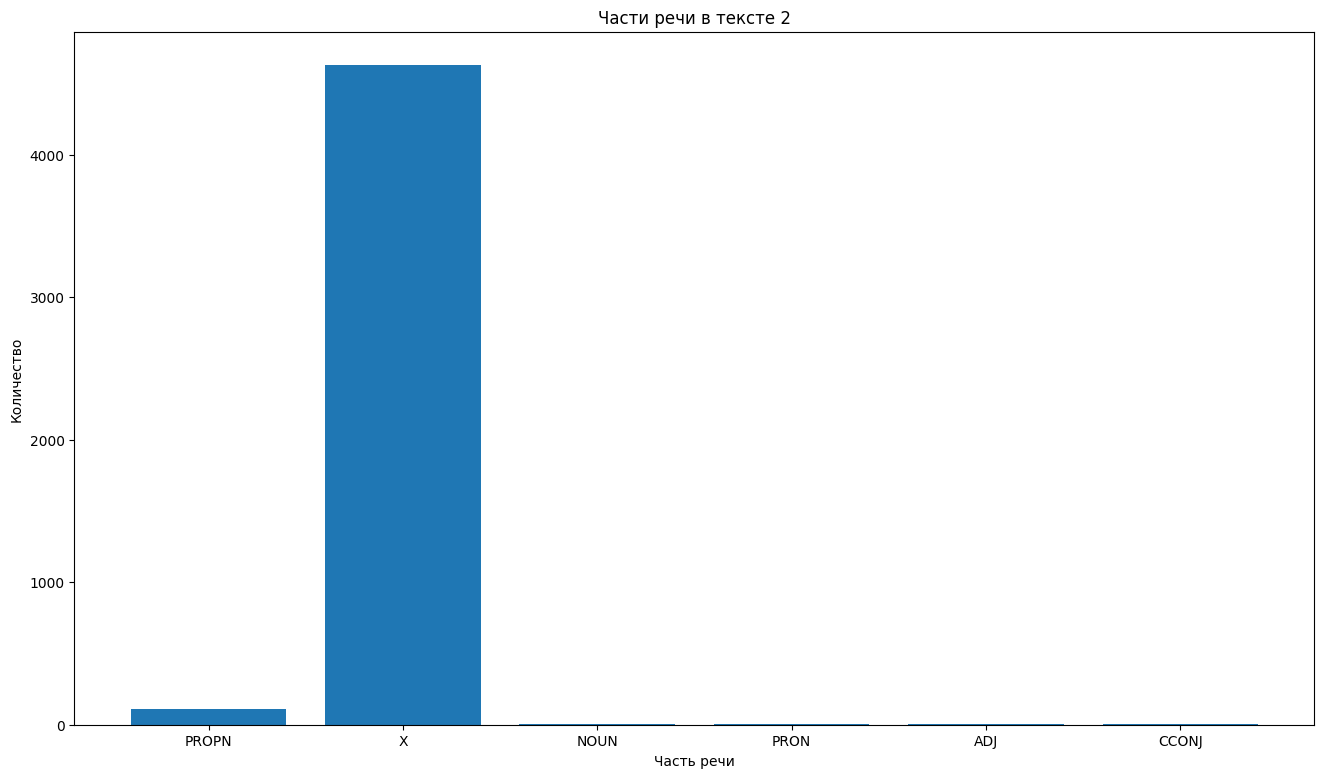

Текст 3: количество токенов по частям речи
X: 7667
PROPN: 103
ADJ: 4
PRON: 8
CCONJ: 8
NOUN: 1


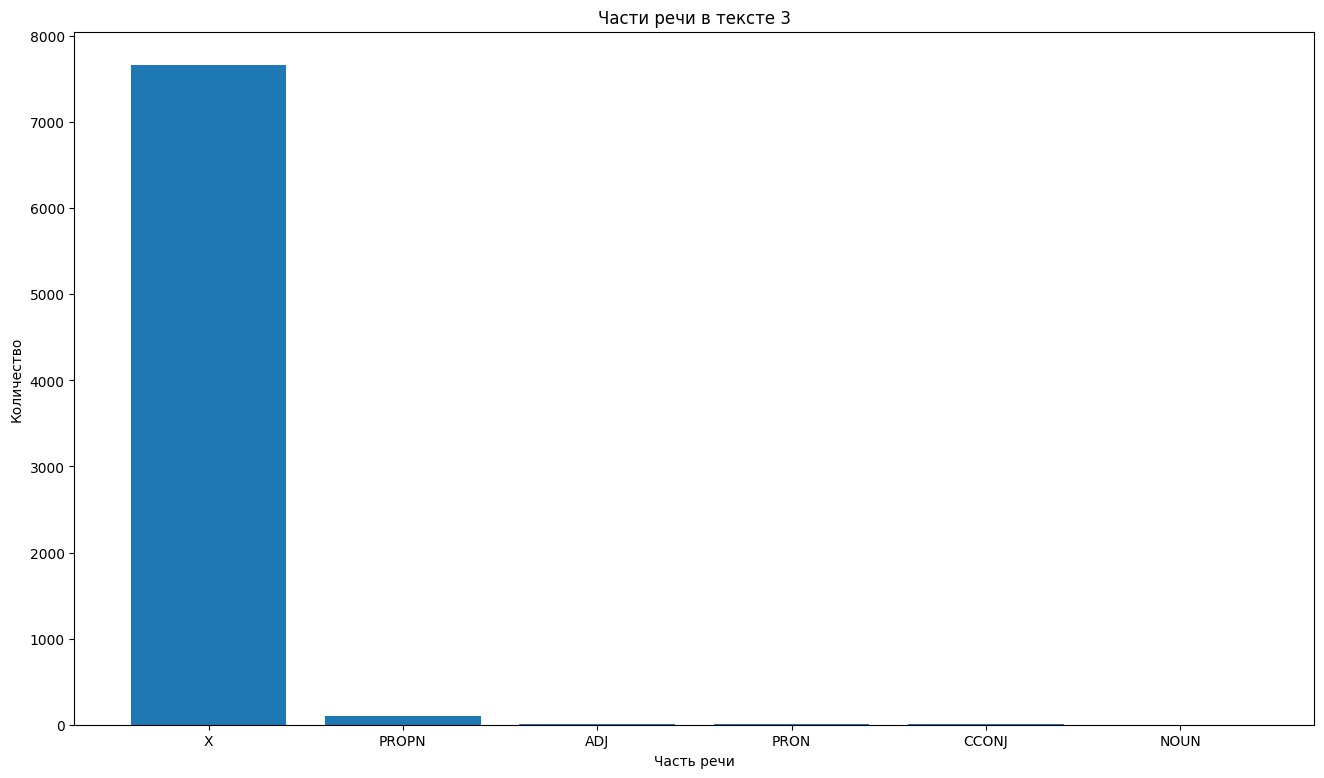

In [ ]:
for i, doc in enumerate(docs):
    pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
    print(f"Текст {i + 1}: количество токенов по частям речи")
    for pos, count in pos_counts.items():
        print(f"{pos}: {count}")

    plt.figure(figsize=(16, 9))
    plt.bar(pos_counts.keys(), pos_counts.values())
    plt.title(f"Части речи в тексте {i + 1}")
    plt.xlabel("Часть речи")
    plt.ylabel("Количество")
    plt.show()

### Задание 7
___

In [ ]:
for i, doc in enumerate(docs):
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    ent_counts = Counter([ent.label_ for ent in doc.ents])
    print(f"Текст {i + 1}: именованные сущности")
    for ent_text, ent_label in ents:
        print(f"{ent_text} — {ent_label}")
    print("Подсчёт по типам:", dict(ent_counts))


Текст 1: именованные сущности
raining — ORG
raining — ORG
lashed by a screaming wind — ORG
The
cold was as great as cold may be while rain is falling — ORG
because — ORG
when he had gone to take the
book from its shelf in the day-room — ORG
Barrack-Room Ballads"[68-1] had
smiled down upon him with — ORG
familiar
East — ORG
strange — ORG
said Captain Adams — ORG
There's trouble over in the foundry town — ORG
The local authorities have
jailed some I. W. W.[69-2] plotters — ORG
the detail rode into the
storm — ORG
First Sergeant Price on John G. — ORG
alert — ORG
mud — ORG
slush — ORG
said First Sergeant Price — ORG
means getting to the party
about four hours late — ORG
Nevertheless — ORG
said First Sergeant Price — ORG
here — ORG
runs straight into it — ORG
Then
the whirling night engulfed them — ORG
Presently — ORG
as the returning messengers drew near — ORG
the Sergeant saw with content that his
emissaries bore on their shoulders between them two new pine — ORG
The Sergeant — ORG
dismo

### Задание 8
___

In [43]:
cleaned_texts_str = [" ".join(tokens) for tokens in cleaned_texts]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_texts_str)

In [46]:
tfidf_matrix.shape

(3, 3099)

### Задание 9
___

<Axes: >

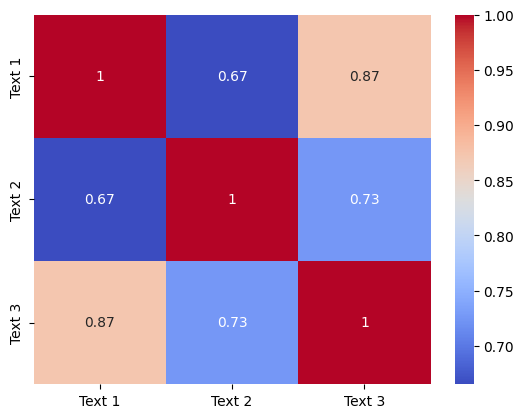

In [ ]:
similarity = cosine_similarity(tfidf_matrix)
sns.heatmap(
    similarity,
    annot=True,
    cmap="coolwarm",
    xticklabels=[f"Text {i + 1}" for i in range(len(corpus))],
    yticklabels=[f"Text {i + 1}" for i in range(len(corpus))],
)

In [58]:
similarity

array([[1.        , 0.66514284, 0.87184735],
       [0.66514284, 1.        , 0.72533677],
       [0.87184735, 0.72533677, 1.        ]])

In [ ]:
n = similarity.shape[0]
max_sim = -1
max_pair = (0, 1)

for i in range(n):
    for j in range(i + 1, n):
        if similarity[i, j] > max_sim:
            max_sim = similarity[i, j]
            max_pair = (i, j)

print(f"Наиболее похожие тексты: {max_pair[0] + 1} и {max_pair[1] + 1}")
print(f"Косинусное сходство: {max_sim:.3f}")

Наиболее похожие тексты: 1 и 3
Косинусное сходство: 0.872
